In [31]:
# STEP - 1 IMPORT NECESSAARY LIBRARY
import pandas as pd
%matplotlib inline 
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# STEP - 2 LOADING THE DATA
df = pd.read_csv('Titanic.csv')

In [3]:
# STEP - 3 EXPLORING THE DATA
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


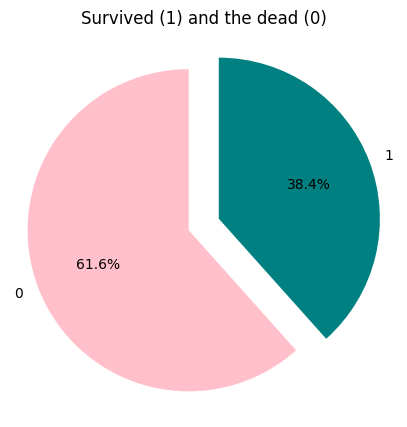

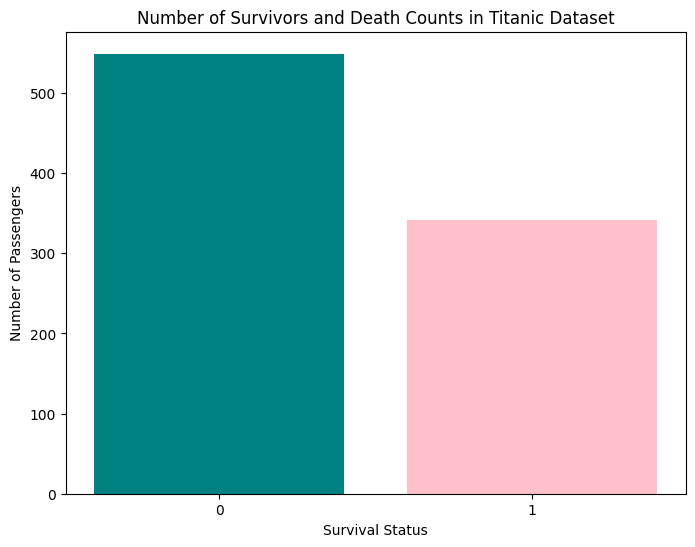

In [8]:
# STEP - 4 DATA VISUALIZATION
# Creating a pie chart to proper understand the number of survivors and death counts.
survival_counts = df['Survived'].value_counts()

labels = ['0', '1']
colors = ['pink', 'teal']
my_explode = (0.1, 0.1)
counts = [survival_counts[0], survival_counts[1]] 

plt.figure(figsize=(5, 5))
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', startangle=90, explode = my_explode, colors=colors)
plt.axis('equal')
plt.title('Survived (1) and the dead (0)')
plt.figure(figsize=(8, 6))  
plt.bar(labels, counts, color=['teal', 'pink']) 
plt.title('Number of Survivors and Death Counts in Titanic Dataset')  
plt.xlabel('Survival Status')  
plt.ylabel('Number of Passengers')  


plt.show()

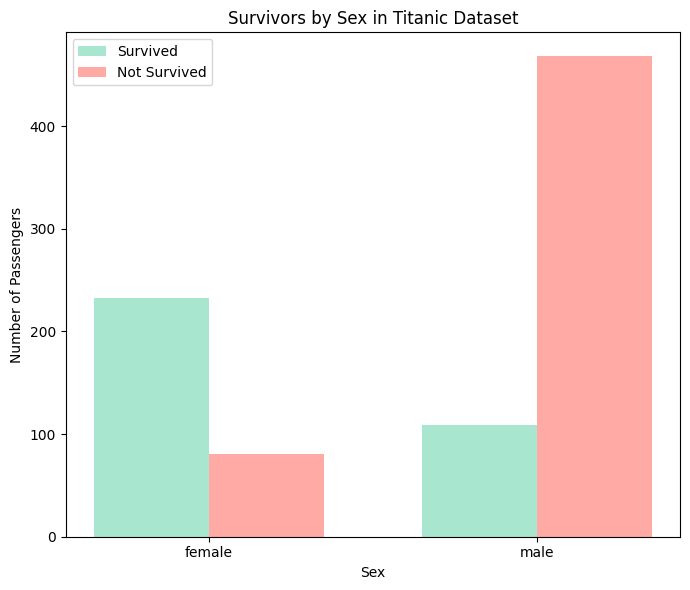

In [9]:
# Creating graphs to analyze survivors by gender
survivors_by_sex = df.groupby(['Sex', 'Survived']).size().unstack()  

labels = survivors_by_sex.index  
survived_counts = survivors_by_sex[1]  # Count of survivors  
not_survived_counts = survivors_by_sex[0]  # Count of non-survivors  

plt.figure(figsize=(7, 6))  
bar_width = 0.35  
x = range(len(labels))  

plt.bar(x, survived_counts, width=bar_width, label='Survived', color='#a8e6cf')  
plt.bar([p + bar_width for p in x], not_survived_counts, width=bar_width, label='Not Survived', color='#ffaaa5')

plt.title('Survivors by Sex in Titanic Dataset')  
plt.xticks([p + bar_width / 2 for p in x], labels)  # Center the x ticks  
plt.xlabel('Sex')  
plt.ylabel('Number of Passengers')  
plt.legend() 
  

plt.tight_layout()  
plt.show() 

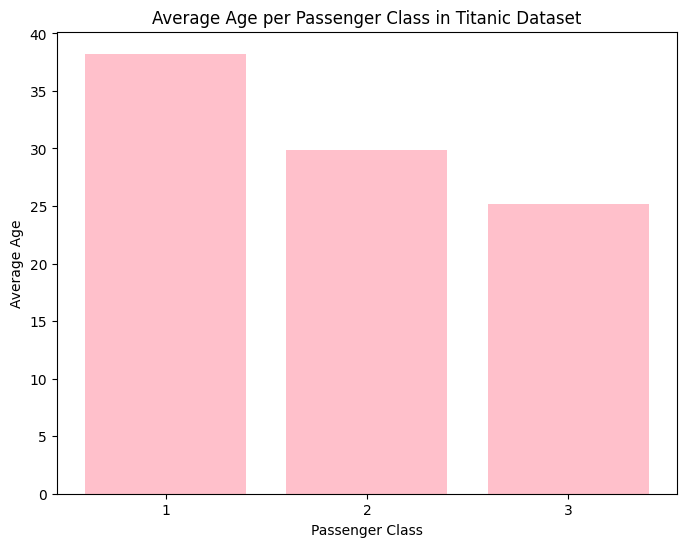

In [10]:
# Bar graph to explore the distribution of passenger ages within each passenger class.

avg_age_per_class = df.groupby('Pclass')['Age'].mean()
plt.figure(figsize=(8, 6))
plt.bar(avg_age_per_class.index, avg_age_per_class.values, color='pink')
plt.xlabel('Passenger Class')
plt.ylabel('Average Age')
plt.title('Average Age per Passenger Class in Titanic Dataset')
plt.xticks(avg_age_per_class.index)
plt.show()

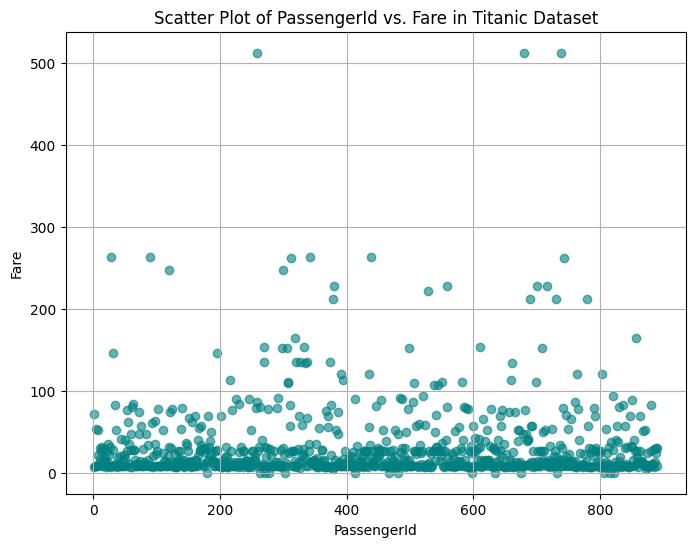

In [11]:
# Scatter plot of PassengerId vs Fare

plt.figure(figsize=(8, 6))
plt.scatter(df['PassengerId'], df['Fare'], color='teal', alpha=0.6)
plt.xlabel('PassengerId')
plt.ylabel('Fare')
plt.title('Scatter Plot of PassengerId vs. Fare in Titanic Dataset')
plt.grid(True)
plt.show()

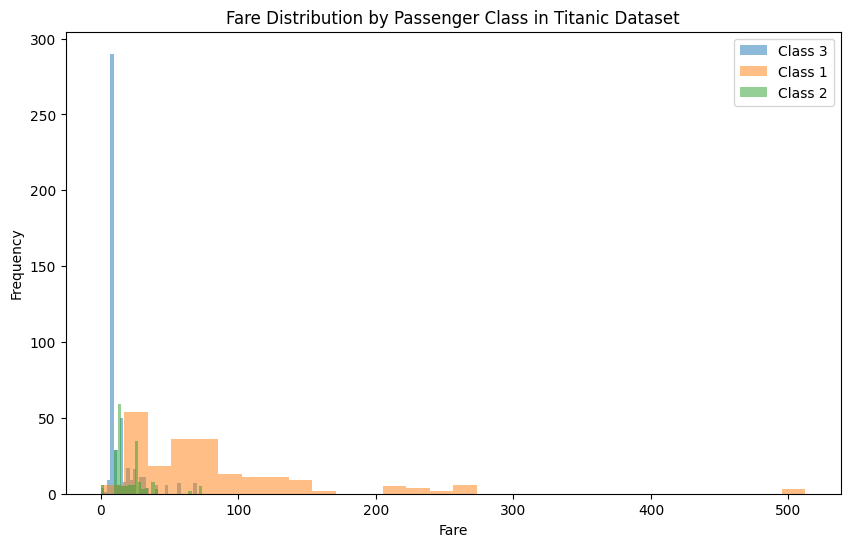

In [12]:
# Distribution of fares across different passenger classes
df = df.dropna(subset=['Fare'])

plt.figure(figsize=(10, 6))
for pclass in df['Pclass'].unique():
    plt.hist(df[df['Pclass'] == pclass]['Fare'], bins=30, alpha=0.5, label=f'Class {pclass}')

plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Distribution by Passenger Class in Titanic Dataset')
plt.legend()
plt.show()

In [13]:
# STEP - 5 DATA PREPROCESSING 
df = df.drop(['Cabin', 'Ticket', 'Name'], axis=1)  

In [16]:
# Fill missing values for 'Age'  
df['Age'] = df['Age'].fillna(df['Age'].median())  

# Fill missing values for 'Embarked'  
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  

In [17]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)  

In [19]:
# Step - 6 Prepare the data for modeling
# Define features and target  
X = df.drop('Survived', axis=1)  
y = df['Survived']  

In [20]:
# Split data into training and testing sets  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

In [21]:
# Step 5: Building the model
# Initialize the model  
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [22]:
# Fit the model  
model.fit(X_train, y_train)  

RandomForestClassifier(random_state=42)

In [26]:
# Step 7: Making predictions and evaluating the model
# Make predictions on the validation set  
y_pred = model.predict(X_test)  

In [32]:
# Evaluate the model  
print("Confusion Matrix:")  
print(confusion_matrix(y_test, y_pred))  
print("\nClassification Report:")  
print(classification_report(y_test, y_pred))  
print("Accuracy Score:", accuracy_score(y_test, y_pred))  

Confusion Matrix:
[[92 13]
 [19 55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Accuracy Score: 0.8212290502793296


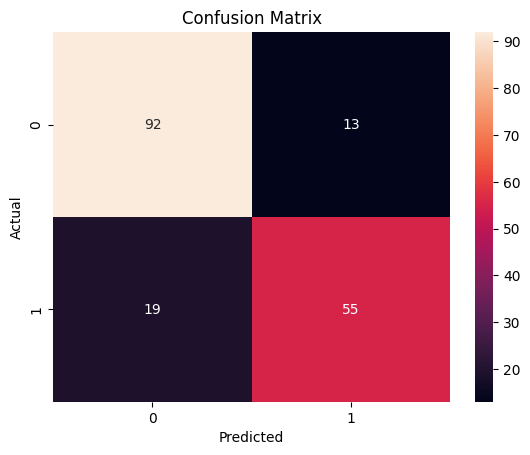

In [33]:
# Step 8: Visualizing results
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')  
plt.ylabel('Actual')  
plt.xlabel('Predicted')  
plt.title('Confusion Matrix')  
plt.show()  